#### IMPORTING REQUIRED LIBRARIES

In [1]:
#Data Manipulation
import pandas as pd

#Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#### IMPORTING THE DATASET

In [2]:
hb_df = pd.read_csv(r"D:\Her Data Project\Hotel Bookings.csv")

#### DATA AUDIT

In [3]:
# First five rows of the dataset
hb_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
# Shape of the dataset
hb_df.shape

(119390, 32)

In [5]:
print("Number of rows",hb_df.shape[0])
print("Number of columns",hb_df.shape[1])

Number of rows 119390
Number of columns 32


In [6]:
# Columns present in the dataset
hb_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
# A concise summary of the dataset
hb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### DATA CLEANING

In [8]:
# Checking for Duplicate values
hb_df.duplicated().sum()

31994

In [9]:
# Dropping duplicate values
hb_df.drop_duplicates(inplace = True)

In [10]:
hb_df.shape

(87396, 32)

In [11]:
# Checking for missing values/null values
hb_df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


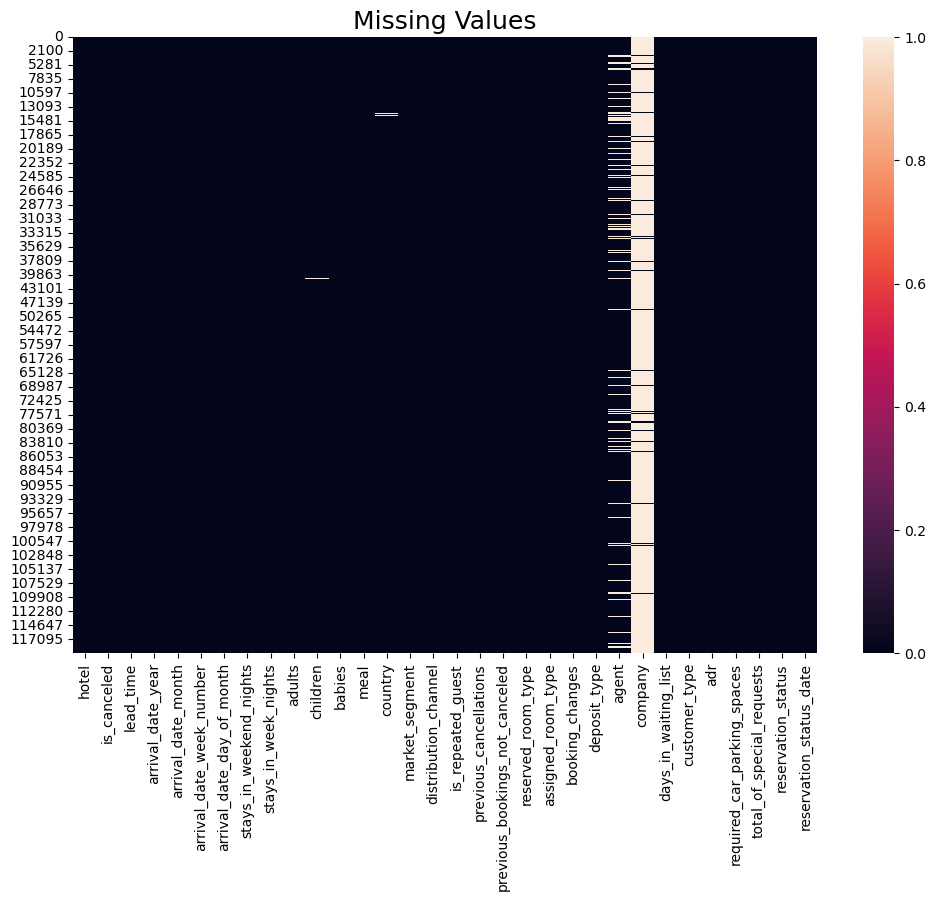

In [12]:
# Visualizing the missing values using Seaborn heatmap

plt.figure(figsize=(12,8))
sns.heatmap(hb_df.isnull())
plt.title('Missing Values', fontsize=18)
plt.show()

### What did you know about your dataset?

##### We can see that there are total four columns with missing/null values : company, agent, country, and chidlren.
###### 1. In children column, I will replace null values with 0 assuming that customer did not have any children.
###### 2. Country column has null values. I will reolace null values in this column with others assuming customer's country was not mentioned        while booking. 
###### 3. Company and agent column it might be a case when customers did not book hotel through them so these columns might have null values in it. As these 2 columns have numeric data in it, I will replace them with 0.

In [13]:
# Getting descriptive statistics summary
hb_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,87396.0,0.274898,0.446466,0.00,0.0,0.0,1.0,1.0
lead_time,87396.0,79.891368,86.052325,0.00,11.0,49.0,125.0,737.0
arrival_date_year,87396.0,2016.210296,0.686102,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,87396.0,26.838334,13.674572,1.00,16.0,27.0,37.0,53.0
arrival_date_day_of_month,87396.0,15.815541,8.835146,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,87396.0,1.005263,1.031921,0.00,0.0,1.0,2.0,19.0
stays_in_week_nights,87396.0,2.625395,2.053584,0.00,1.0,2.0,4.0,50.0
adults,87396.0,1.875795,0.626500,0.00,2.0,2.0,2.0,55.0
children,87392.0,0.138640,0.455881,0.00,0.0,0.0,0.0,10.0
babies,87396.0,0.010824,0.113597,0.00,0.0,0.0,0.0,10.0


In [14]:
# Checking Unique Values for each variable
# creating a series consisting every column name of the dataset and it's value
# used for loop to iterate over every column in the dataset

pd.Series({col:hb_df[col].unique() for col in hb_df})

hotel                                                    [Resort Hotel, City Hotel]
is_canceled                                                                  [0, 1]
lead_time                         [342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68...
arrival_date_year                                                [2015, 2016, 2017]
arrival_date_month                [July, August, September, October, November, D...
arrival_date_week_number          [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...
arrival_date_day_of_month         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
stays_in_weekend_nights           [0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,...
stays_in_week_nights              [0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,...
adults                            [2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]
children                                            [0.0, 1.0, 2.0, 10.0, 3.0, nan]
babies                                                             [0, 1, 2,

### Data Wrangling

In [15]:
# creating a duplicate of the original dataset before making any changes in it
hb_df1 = hb_df.copy()

In [16]:
hb_df1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [17]:
# replacing null values in children column with 0 assuming that family had 0 children
# replacing null values in company and agent columns with 0 assuming those rooms were booked without company/agent

hb_df1['children'].fillna(0, inplace = True)
hb_df1['company'].fillna(0, inplace = True)
hb_df1['agent'].fillna(0, inplace = True)

# replacing null values in country column as 'Others'

hb_df1['country'].fillna('Others', inplace = True)

In [18]:
# checking for null values after replacing them
hb_df1.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [19]:
# dropping the 'company' column as it contains a lot of null values in comparison to other columns
hb_df1.drop(['company'], axis = 1, inplace = True)

In [20]:
# dropping rows where no adults, children and babies are available because no bookings were made that day 

no_guest =hb_df1[hb_df1['adults'] +  hb_df1['babies'] + hb_df1['children'] == 0]
hb_df1.drop(no_guest.index, inplace = True)

In [21]:
# adding some new columns to make our data analysis ready
# creating total people column by adding all people in that booking
hb_df1['total_people'] = hb_df1['adults'] + hb_df1['babies'] + hb_df1['children']

In [22]:
# creating a column to check total stay by prople in that booking
hb_df1['total_stay'] = hb_df1['stays_in_weekend_nights'] + hb_df1['stays_in_week_nights'] 

In [23]:
# having a final look to check if our dataset is ready to analyze
hb_df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people,total_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0,2


In [24]:
# checking the final shape of the dataset
hb_df1.shape
print("Number of rows", hb_df1.shape[0])
print("Number of columns", hb_df1.shape[1])

Number of rows 87230
Number of columns 33


In [25]:
# checking the unique values which is to be analysed
pd.Series({col:hb_df1[col].unique() for col in hb_df1})

hotel                                                    [Resort Hotel, City Hotel]
is_canceled                                                                  [0, 1]
lead_time                         [342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68...
arrival_date_year                                                [2015, 2016, 2017]
arrival_date_month                [July, August, September, October, November, D...
arrival_date_week_number          [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...
arrival_date_day_of_month         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
stays_in_weekend_nights           [0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,...
stays_in_week_nights              [0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,...
adults                            [2, 1, 3, 4, 40, 26, 50, 27, 55, 20, 6, 5, 10, 0]
children                                                 [0.0, 1.0, 2.0, 10.0, 3.0]
babies                                                             [0, 1, 2,

### Data Vizualization, Storytelling & Experimenting with charts: Understanding the relationships between variables

### 1. Which type of hotel is most preffered by the guests?

In [26]:
# Storing unique hotel names in a variable 
hotel_name = hb_df1['hotel'].unique()

In [27]:
# Checking the number of unique booking in each hotel type 
unique_booking = hb_df1.hotel.value_counts()

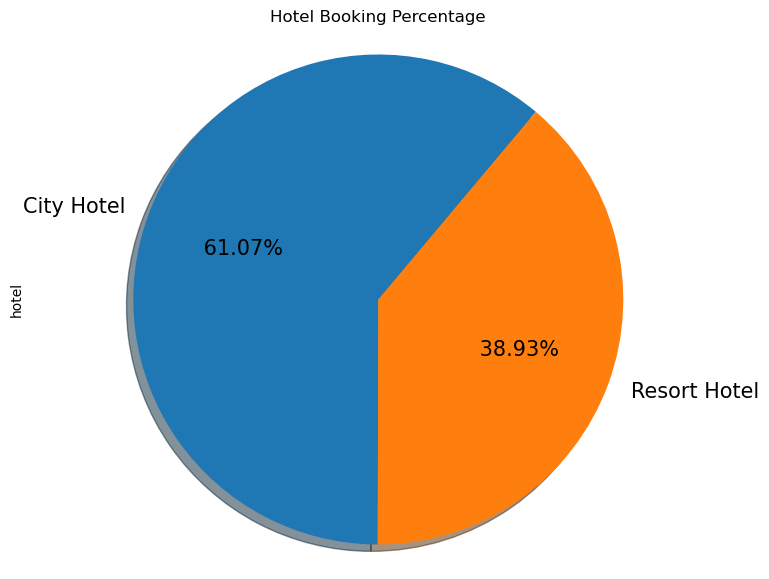

In [28]:
# Creating a pie chart using plotly.express
# Count Hotel
hotel_count = hb_df1.hotel.value_counts()

# Plotting Values in a simple pie chart
hotel_count.plot.pie(figsize=(9,7), autopct =' %1.2f%%', shadow = True, fontsize=15, startangle=50)

# Setting the title
plt.title('Hotel Booking Percentage')
plt.axis('equal')
plt.show()

### 2. What is percentage of hotel booking cancellation?

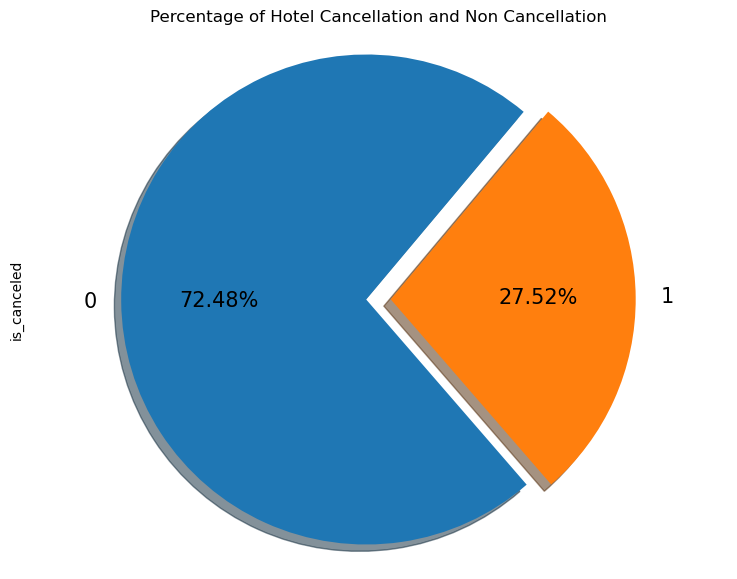

In [29]:
# Extracting and storing unique values of hotel cancelation
cancelled_hotel = hb_df1.is_canceled.value_counts()

# Creating a pie chart
cancelled_hotel.plot.pie(figsize=(9,7), explode=(0.05,0.05), autopct = '%1.2f%%', shadow=True, fontsize=15,startangle=50)

# Giving pie chart a title
plt.title('Percentage of Hotel Cancellation and Non Cancellation')
plt.axis('equal')
plt.show()

### 3. Which type of meal is most preffered by guests?

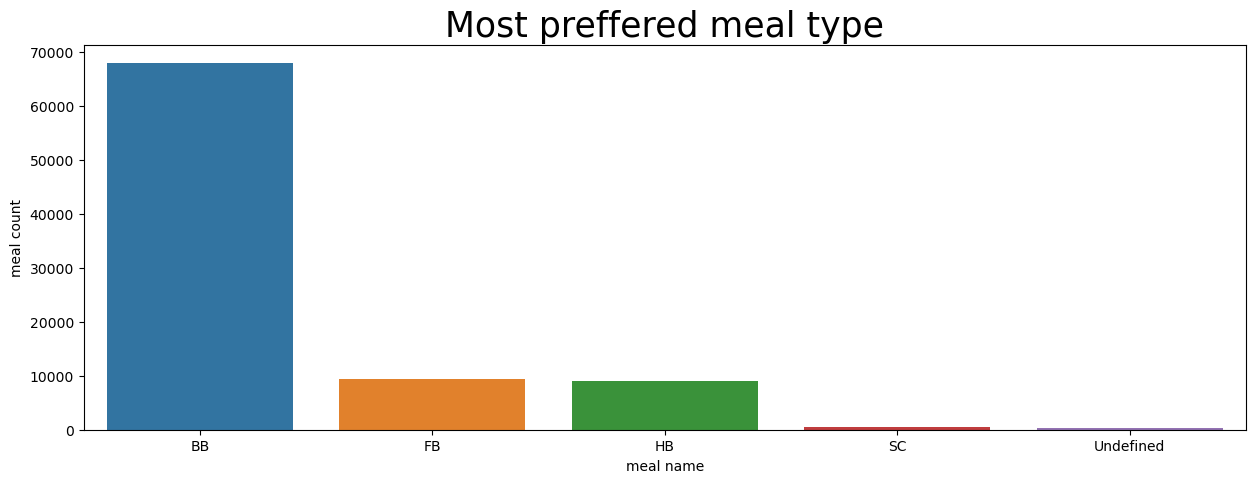

In [30]:
# Counting each meal type
meal_count = hb_df1.meal.value_counts()

# Extracting each meal type and storing in a variable
meal_name = hb_df1['meal'].unique()

# Creating a dataset of each meal type and count
meal_df = pd.DataFrame(zip(meal_name,meal_count), columns = ['meal name', 'meal count'])

# Visualising the values on a bar chart
plt.figure(figsize=(15,5))
g = sns. barplot(data=meal_df, x='meal name', y = 'meal count')
g.set_xticklabels(meal_df['meal name'])
plt.title('Most preffered meal type', fontsize=25)
plt.show()

### 4. Which year has the most bookings?

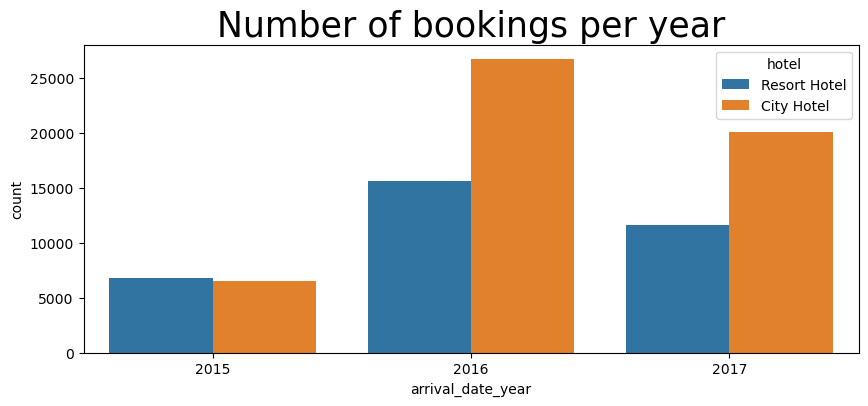

In [31]:
# Plot with countplot
plt.figure(figsize=(10,4))
sns.countplot(x=hb_df1['arrival_date_year'],hue=hb_df1['hotel'])
plt.title('Number of bookings per year', fontsize = 25)
plt.show()

### 5. Which month has the most bookings in each hotel type?

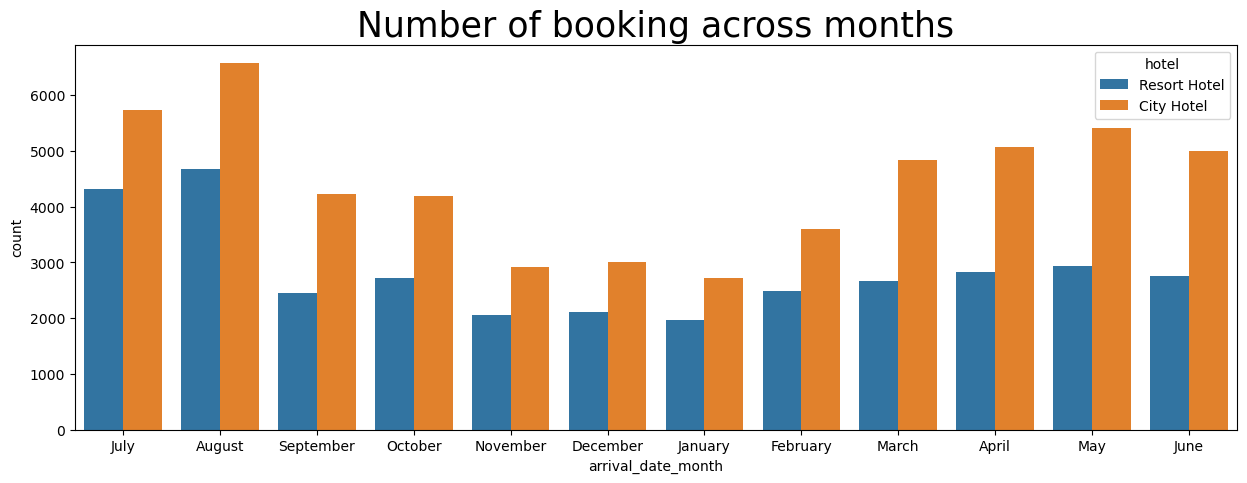

In [32]:
# plot with countplot
plt.figure(figsize=(15,5))
sns.countplot(x=hb_df1['arrival_date_month'], hue=hb_df1['hotel'])
plt.title('Number of booking across months', fontsize = 25)
plt.show()

### 6. Which country do most guests come from?

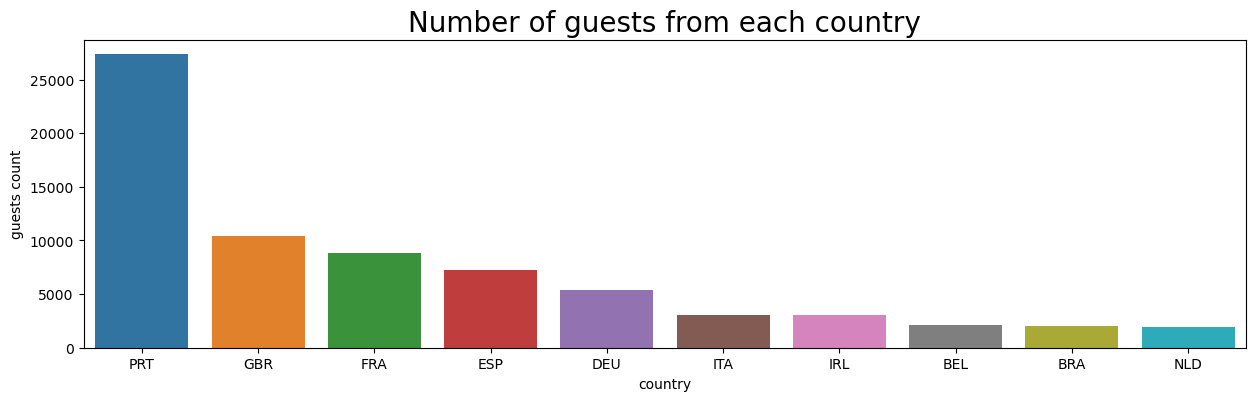

In [33]:
# Counting number of guests from various countries and changing column names
country_df = hb_df1['country'].value_counts().reset_index().rename(columns={'index':'country', 'country':'guests count'})[:10]

# Visualising the values on a bar chart
# setting the graph size
plt.figure(figsize=(15,4))
sns.barplot(x=country_df['country'], y=country_df['guests count'])
plt.title('Number of guests from each country', fontsize=20)
plt.show()

### 7. Which room type is most preffered by guests?

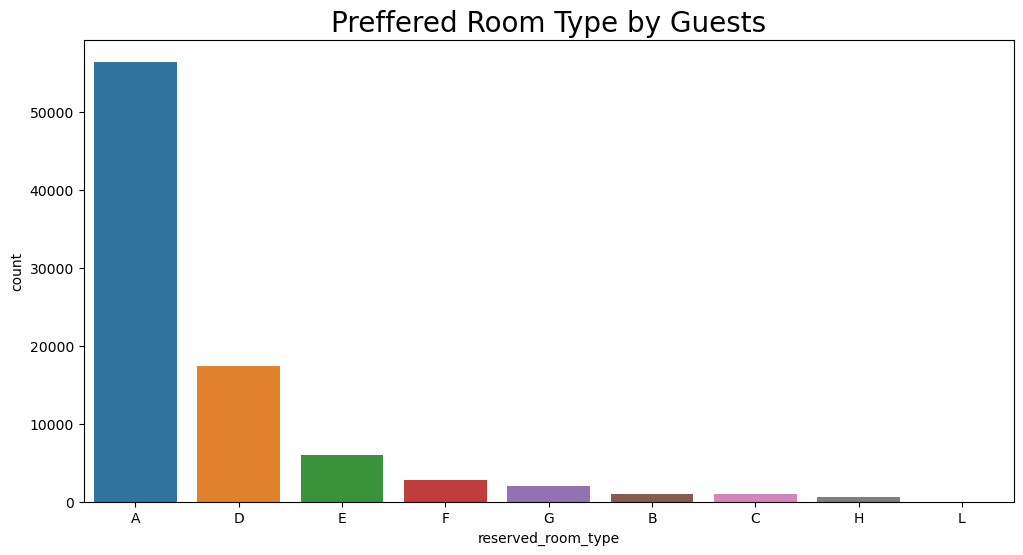

In [34]:
# Setting the figure size
plt.figure(figsize=(12,6))

# Plotting the values in chart
sns.countplot(x=hb_df1['reserved_room_type'], order=hb_df1['reserved_room_type'].value_counts().index)

# Setting the title
plt.title('Preffered Room Type by Guests', fontsize = 20)

# Show the chart
plt.show()

### 8. Which room type is most assigned?

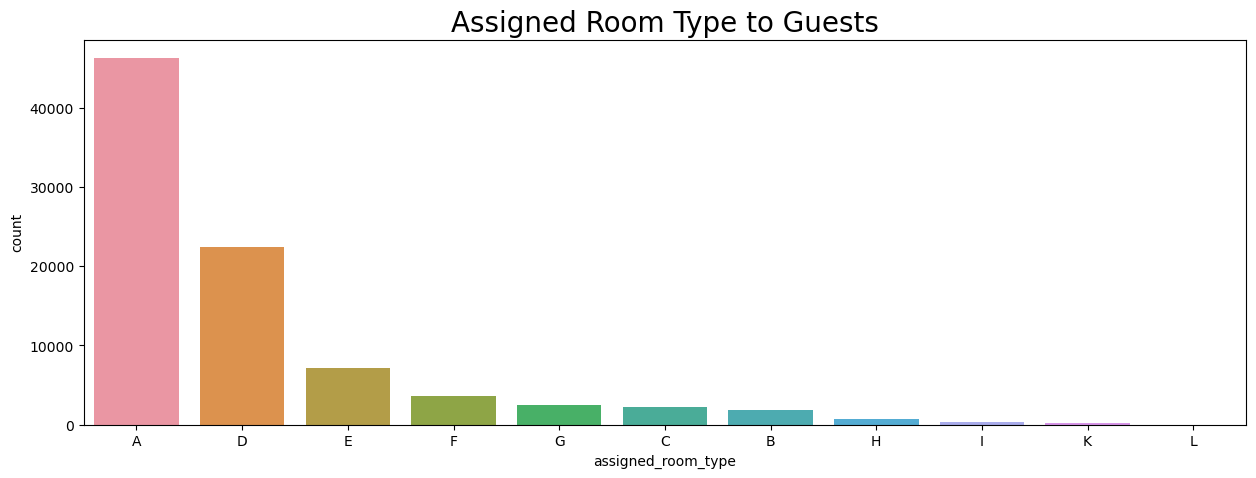

In [35]:
# Setting the figure size
plt.figure(figsize=(15,5))

# Plotting the values in chart
sns.countplot(x=hb_df1['assigned_room_type'], order=hb_df1['assigned_room_type'].value_counts().index)

# Setting the title
plt.title('Assigned Room Type to Guests', fontsize = 20)

# Show the chart
plt.show()

### 9. What is the percentage of repeated guests?

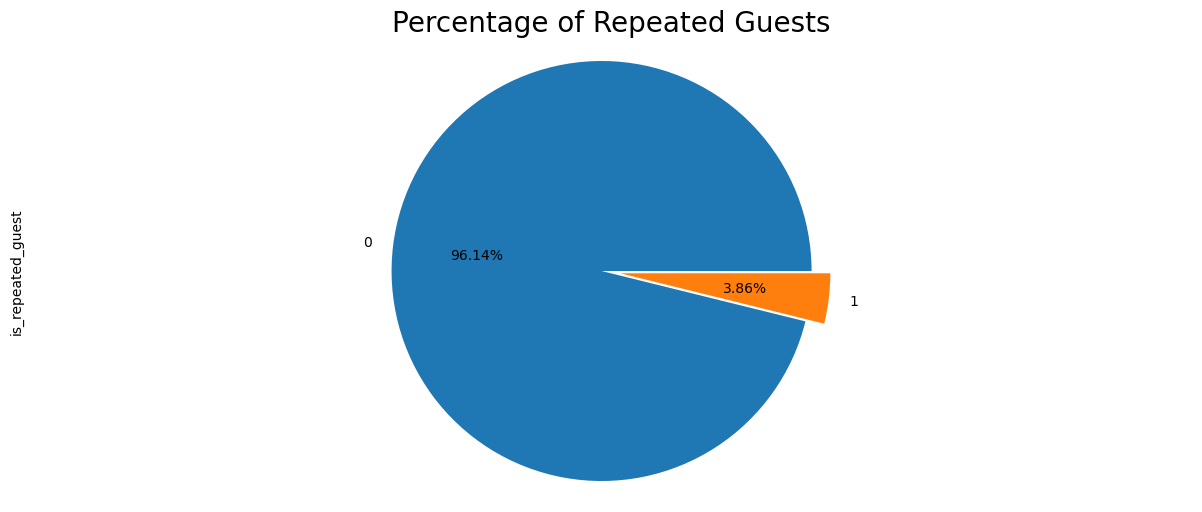

In [36]:
# Creating a variable containing guests with their repeated counts
rep_guests = hb_df1['is_repeated_guest'].value_counts()

# Plotting the values in a pie chart
rep_guests.plot.pie(autopct='%1.2f%%', explode=(0.00,0.09), figsize=(15,6), shadow=False)

# Setting the title
plt.title('Percentage of Repeated Guests', fontsize=20)

# Setting the chart in centre
plt.axis('equal')

# Show the chart
plt.show()

### 10. Which customer type has themost booking?

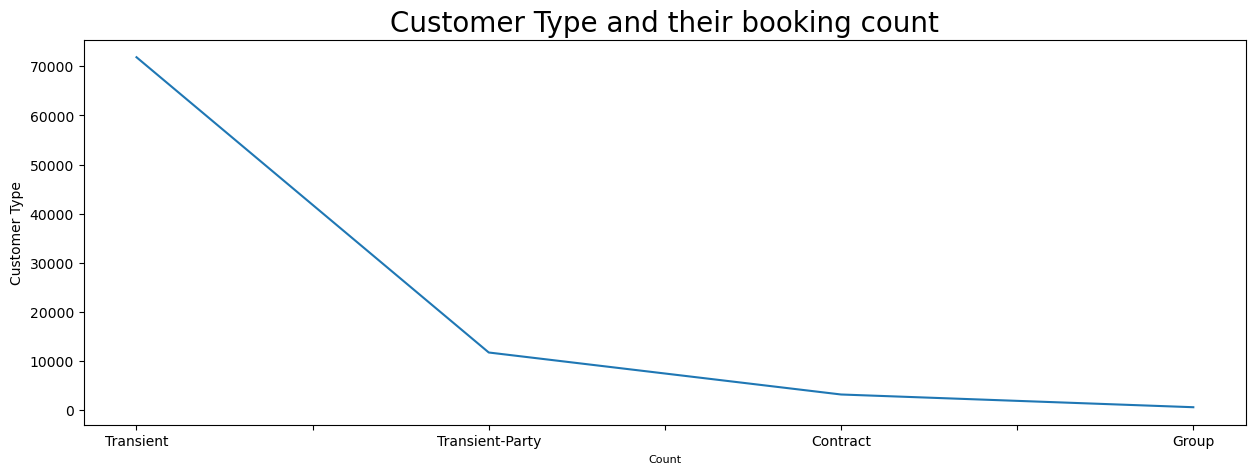

In [37]:
# Visualisation code
cust_type = hb_df1['customer_type'].value_counts()

# Plotting the values in a line chart
cust_type.plot(figsize=(15,5))

# Setting the x label, y label and title
plt.xlabel('Count', fontsize=8)
plt.ylabel('Customer Type', fontsize=10)
plt.title('Customer Type and their booking count', fontsize=20)

# Show the chart
plt.show()

### 11. Which Market Segment has the most booking?

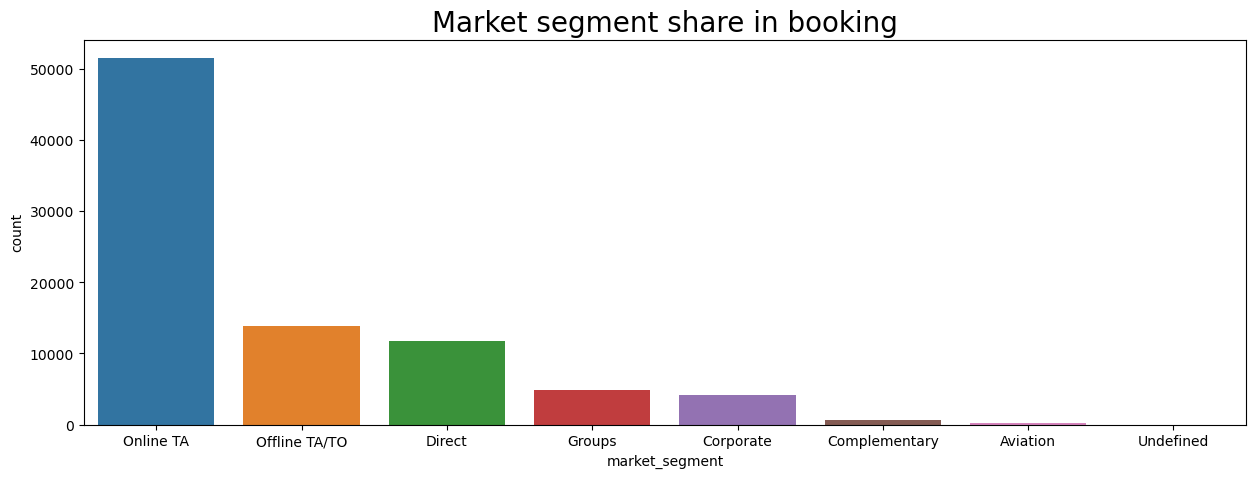

In [38]:
# Visualization code
plt.figure(figsize=(15,5))
sns.countplot(x=hb_df1['market_segment'], order = hb_df1['market_segment'].value_counts().index)
plt.title('Market segment share in booking', fontsize=20)
plt.show()

### 12. Which deposit type is most preffered?

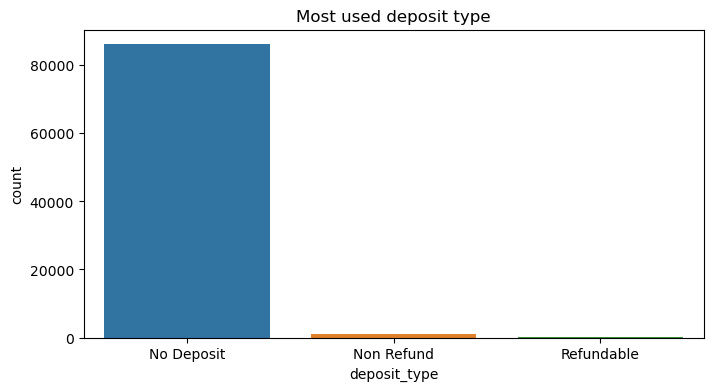

In [39]:
# Counting each deposit type
deposit = hb_df1['deposit_type'].value_counts().index

# Setting the chart size
plt.figure(figsize=(8,4))

#plotting the values
sns.countplot(x=hb_df1['deposit_type'], order = deposit)
plt.title('Most used deposit type')
plt.show()

### 13. What is the adr across different months?

In [40]:
# Grouping arrival_month and hotel on mean of adr
bookings_months = hb_df1.groupby(['arrival_date_month','hotel'])['adr'].mean().reset_index()

# Creating a month list to order the months in ascending
months = ['January', 'February', 'March', 'April','May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Creating a dataset of months, hotel and their adr
bookings_months['arrival_date_month']=pd.Categorical(bookings_months['arrival_date_month'],categories=months, ordered = True)

# Sorting the months
bookings_months=bookings_months.sort_values('arrival_date_month')
bookings_months

,arrival_date_month,hotel,adr
8,January,City Hotel,85.269875
9,January,Resort Hotel,49.181693
6,February,City Hotel,89.266427
7,February,Resort Hotel,54.102809
15,March,Resort Hotel,57.590889
14,March,City Hotel,95.193911
0,April,City Hotel,117.314134
1,April,Resort Hotel,79.283805
17,May,Resort Hotel,80.551101
16,May,City Hotel,128.055724


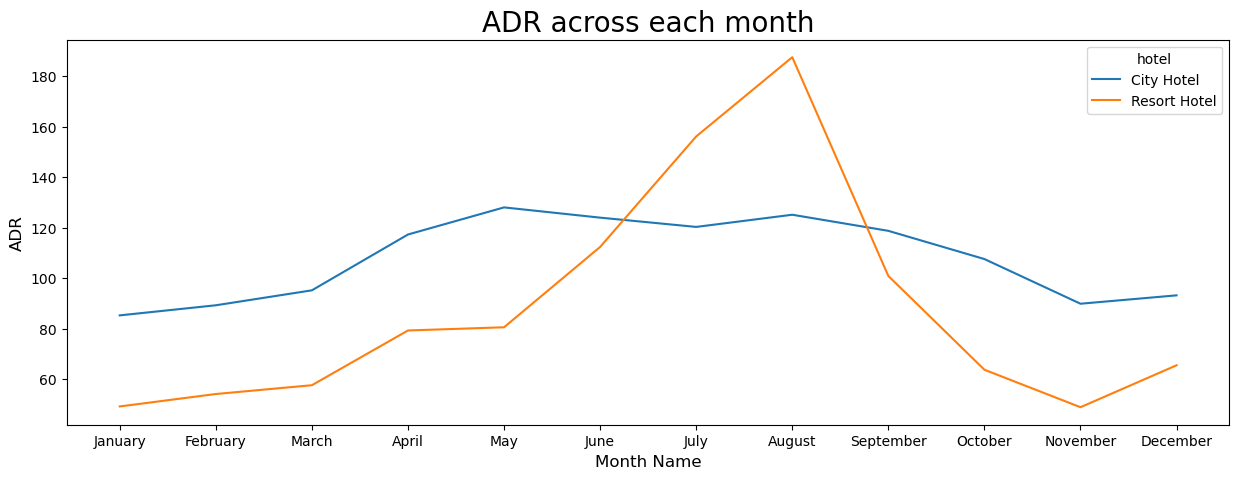

In [41]:
# Plotting the values in a line chart
plt.figure(figsize=(15,5))
sns.lineplot(x=bookings_months['arrival_date_month'],y=bookings_months['adr'],hue=bookings_months['hotel'])

# Setting the labels, title and showing the chart
plt.title('ADR across each month', fontsize=20)
plt.xlabel('Month Name', fontsize=12)
plt.ylabel('ADR', fontsize=12)
plt.show()

### 14. Which distribution channel has highest adr?

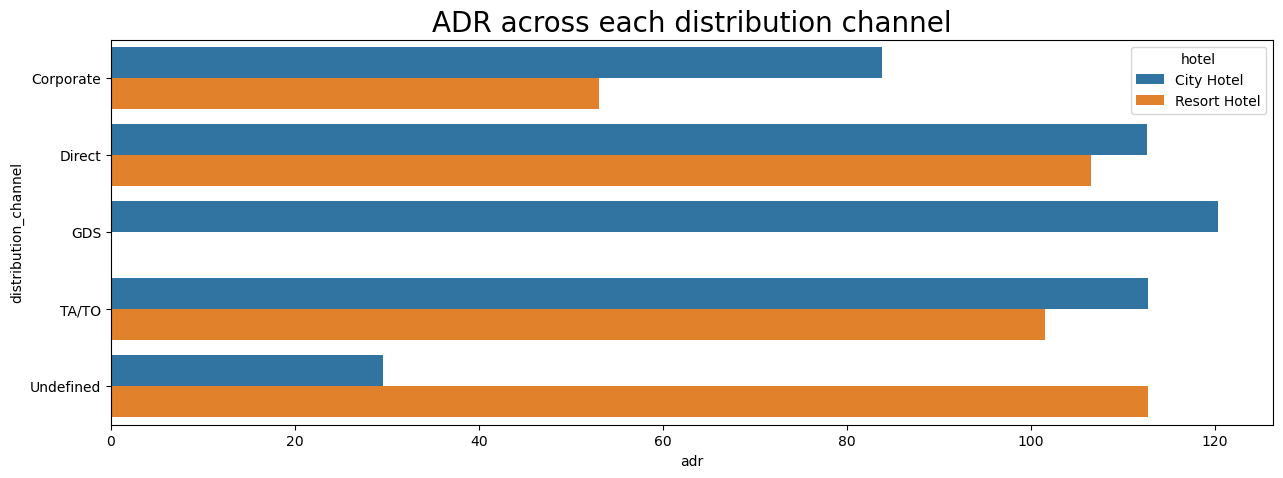

In [42]:
# Grouping dist_channel and hotels on their adr
dist_channel_adr = hb_df1.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index()

# Setting the figure size
plt.figure(figsize=(15,5))

# Creating a horizontal bar chart
sns.barplot(x='adr', y='distribution_channel', data=dist_channel_adr, hue='hotel')

# Setting the title
plt.title('ADR across each distribution channel', fontsize=20)

# Show chart
plt.show()